# Heart Disease UCI Data Preprocessing
Dataset was downloaded from Kaggle. The target is to build a machine learnign model to predict whether there is a chance of heart attack based on the different parameters. In this document I will preprocess the data for it to be used in the prediction.
## 1. About data set (Quote from Kaggle as fixed by discussion session)
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
Attribute Information
#### 1) age
#### 2) sex
##### 3) chest pain type (4 values: 0 = Asymptomatic angina, 1 = Atypical angina, 2 = Non-angina, 3 = Typical angina)
#### 4) resting blood pressure
#### 5) serum cholestoral in mg/dl
#### 6) fasting blood sugar > 120 mg/dl
#### 7) resting electrocardiographic results (1 = Normal, 2 = ST-T wave abnormality, 0 = Left ventricular hypertrophy)
#### 8) maximum heart rate achieved
#### 9) exercise induced angina
#### 10) oldpeak = ST depression induced by exercise relative to rest
#### 11) the slope of the peak exercise ST segment (0 = downsloping, 1 = upsloping, 2 = flat)
#### 12) number of major vessels (0-3) colored by flourosopy
#### 13) thal: 0 = NA, 1 = normal; 2 = fixed defect; 3 = reversable defect
#### 14) target: 0= less chance of heart attack 1= more chance of heart attack

## 2. Load and preview the data

In [1]:
# Import, review and copy the data
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
raw_data_set = pd.read_csv("heart.csv")
df = raw_data_set.copy()

In [2]:
 # Review the whole dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Understand the information provided by the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## 3. Preprocess the dataset by columns
So at this stage we want to go through all the 14 columns to preprocess the dataset.

### 3.1 Age, trestbps, chol, thalach, oldpeak, ca
Age is a nummerical parameter, the value of which has numerical meaning, thus should be kept in the original format. The following code explores the distribution of the dataset. We can see from the results that the age data distribute in the range of 29 to 77, which covers a group of people who might have heart attack problem.
This applies to the columns of "trestbps", "chol", "thalach", "old peak", "ca" as they are all numerical parameters although some are discreet. The coding below also describe the statistics of these parameter.

The ages shown in this dataset:
 (array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 74, 76, 77], dtype=int64), array([ 1,  2,  4,  2,  3,  4,  3, 10,  8,  8, 11,  8,  7,  5,  7,  5,  7,
       12, 13,  8, 16,  8, 11, 17, 19, 14, 11,  8, 11,  9, 10,  8,  7,  9,
        4,  3,  4,  3,  1,  1,  1], dtype=int64))
Maximum in age: 77
Minimum in age: 29
Type of data in 'age' column: <class 'numpy.int64'>


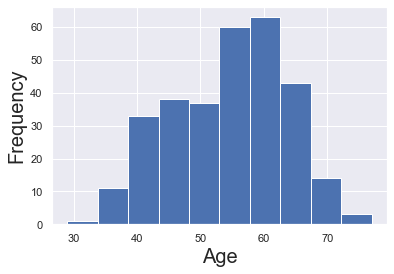

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


In [4]:
# Understand the "age" parameter
print("The ages shown in this dataset:\n", np.unique(df["age"],return_counts = True))
print("Maximum in age:", df["age"].max())
print("Minimum in age:", df["age"].min())
print("Type of data in 'age' column:", type(df["age"][0]))
plt.hist(df["age"], bins = 10)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["age"].describe())

The trestbps shown in this dataset:
 (array([ 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117,
       118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135,
       136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156,
       160, 164, 165, 170, 172, 174, 178, 180, 192, 200], dtype=int64), array([ 2,  4,  1,  2,  1,  3,  1,  6, 19,  9,  1,  3,  1,  7, 37,  4,  1,
        6, 11,  3, 12,  1, 36,  8,  5,  6,  3, 13, 32,  3,  2,  5,  2,  2,
       17,  5,  1,  1,  1, 11,  1,  1,  4,  1,  1,  2,  3,  1,  1],
      dtype=int64))
Maximum in trestbps: 200
Minimum in trestbps: 94
Type of data in 'trestbps' column: <class 'numpy.int64'>


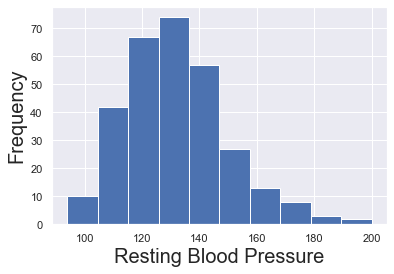

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


In [5]:
# Understand the "trestbps" parameter
print("The trestbps shown in this dataset:\n", np.unique(df["trestbps"],return_counts = True))
print("Maximum in trestbps:", df["trestbps"].max())
print("Minimum in trestbps:", df["trestbps"].min())
print("Type of data in 'trestbps' column:", type(df["trestbps"][0]))
plt.hist(df["trestbps"], bins = 10)
plt.xlabel("Resting Blood Pressure", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["trestbps"].describe())

The serum cholestoral in mg/dl shown in this dataset:
 (array([126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174,
       175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192,
       193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275,
       276, 277, 278, 281, 282, 283, 284, 286, 288, 289, 290, 293, 294,
       295, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311,
       313, 315, 318, 319, 321, 322, 325, 326, 327, 330, 335, 340, 341,
       342, 353, 354, 360, 394, 407, 409, 417, 564], dtype=int64), array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1,

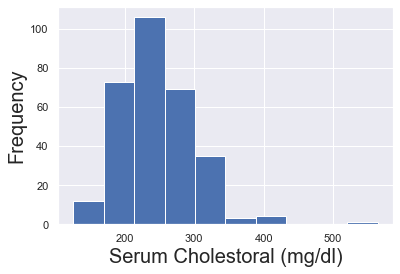

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


In [6]:
# Understand the "chol" parameter
print("The serum cholestoral in mg/dl shown in this dataset:\n", np.unique(df["chol"],return_counts = True))
print("Maximum in serum cholestoral in mg/dl:", df["chol"].max())
print("Minimum in serum cholestoral in mg/dl:", df["chol"].min())
print("Type of data in 'chol' column:", type(df["chol"][0]))
plt.hist(df["chol"], bins = 10)
plt.xlabel("Serum Cholestoral (mg/dl)", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["chol"].describe())

Maximum heart rate achieved shown in this dataset:
 (array([ 71,  88,  90,  95,  96,  97,  99, 103, 105, 106, 108, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179,
       180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194, 195, 202],
      dtype=int64), array([ 1,  1,  1,  1,  2,  1,  1,  2,  3,  1,  2,  2,  3,  2,  1,  3,  3,
        2,  1,  1,  3,  1,  4,  2,  1,  7,  4,  1,  1,  1,  4,  4,  7,  2,
        1,  2,  1,  3,  2,  6,  3,  6,  7,  7,  4,  4,  5,  3,  2,  7,  4,
        8,  3,  5,  4,  6,  5,  6,  4,  9,  5, 11,  9,  2,  5,  3,  1,  5,
        6,  5,  4,  7,  8,  5,  3,  1,  5,  5,  2,  2,  5,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1], dtype=int64))
M

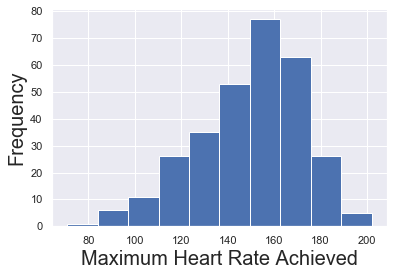

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


In [7]:
# Understand the "thalach" parameter
print("Maximum heart rate achieved shown in this dataset:\n", np.unique(df["thalach"],return_counts = True))
print("Maximum in maximum heart rate achieved:", df["thalach"].max())
print("Minimum in maximum heart rate achieved:", df["thalach"].min())
print("Type of data in 'thalach' column:", type(df["thalach"][0]))
plt.hist(df["thalach"], bins = 10)
plt.xlabel("Maximum Heart Rate Achieved", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["thalach"].describe())

Oldpeak shown in this dataset:
 (array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.8, 2.9, 3. , 3.1, 3.2, 3.4, 3.5, 3.6, 3.8, 4. , 4.2, 4.4, 5.6,
       6.2]), array([99,  7, 12,  3,  9,  5, 14,  1, 13,  3, 14,  2, 17,  1, 13,  5, 11,
       10,  5,  9,  1,  4,  2,  3,  2,  6,  6,  1,  5,  1,  2,  3,  1,  4,
        1,  3,  2,  1,  1,  1], dtype=int64))
Maximum in oldpeak: 6.2
Minimum in oldpeak: 0.0
Type of data in 'oldpeak' column: <class 'numpy.float64'>


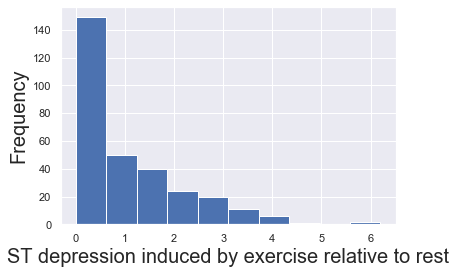

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


In [8]:
# Understand the "oldpeak" parameter
print("Oldpeak shown in this dataset:\n", np.unique(df["oldpeak"],return_counts = True))
print("Maximum in oldpeak:", df["oldpeak"].max())
print("Minimum in oldpeak:", df["oldpeak"].min())
print("Type of data in 'oldpeak' column:", type(df["oldpeak"][0]))
plt.hist(df["oldpeak"], bins = 10)
plt.xlabel("ST depression induced by exercise relative to rest", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["oldpeak"].describe())

Number of major vessels shown in this dataset:
 (array([0, 1, 2, 3, 4], dtype=int64), array([175,  65,  38,  20,   5], dtype=int64))
Maximum in number of major vessels: 4
Minimum in number of major vessels: 0
Type of data in 'ca' column: <class 'numpy.int64'>


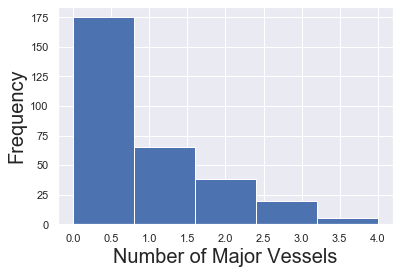

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64


In [9]:
# Understand the "thalach" parameter
print("Number of major vessels shown in this dataset:\n", np.unique(df["ca"],return_counts = True))
print("Maximum in number of major vessels:", df["ca"].max())
print("Minimum in number of major vessels:", df["ca"].min())
print("Type of data in 'ca' column:", type(df["ca"][0]))
plt.hist(df["ca"], bins = 5)
plt.xlabel("Number of Major Vessels", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["ca"].describe())

### 3.2 Sex, fbs, exang, target (binary parameters)
Sex is a categorical parameter, with "0" representing female and "1" for male. In this case, we do not need to do any preprocess for this column. This applies to three other columns in this dataset: fbs, exang, target. All these four parameters are categorical with two possible values. The following codes confirm this understanding and showing the frequncy of the two different values for each of the four columns. 

In [10]:
print("The sex values shown in this dataset:\n", np.unique(df["sex"],return_counts = True))

print("The fasting blood sugar > 120 mg/dl:\n", np.unique(df["fbs"],return_counts = True))

print("The exercise induced angina:\n", np.unique(df["exang"],return_counts = True))

print("The target values shown in this dataset:\n", np.unique(df["target"],return_counts = True))

The sex values shown in this dataset:
 (array([0, 1], dtype=int64), array([ 96, 207], dtype=int64))
The fasting blood sugar > 120 mg/dl:
 (array([0, 1], dtype=int64), array([258,  45], dtype=int64))
The exercise induced angina:
 (array([0, 1], dtype=int64), array([204,  99], dtype=int64))
The target values shown in this dataset:
 (array([0, 1], dtype=int64), array([138, 165], dtype=int64))


### 3.3 cp, restecg, slope, thal (categorical parameters)
At this step we will preprocess the four categorical parameters which have more than 2 possible values. The following coding cells help review the four different parameters "cp", "restecg", "slope", "thal". For each parameter, dummy variables have been obtained as teh values only represent a certain category rather than a real numerical meaning. And the dummy variables are mutually exclusive and collectively exhaustive (MECE), so the first column should be dropped with obtaining the dummies.After that the newly obtained columns are combined with the original dataframe, followed by deleting the original parameter and moving the new columns to the designated place to replace it.  

The chest pain type shown in this dataset:
 (array([0, 1, 2, 3], dtype=int64), array([143,  50,  87,  23], dtype=int64))
Maximum in chestpain type : 3
Minimum in chestpain type: 0
Type of data in 'cp' column: <class 'numpy.int64'>


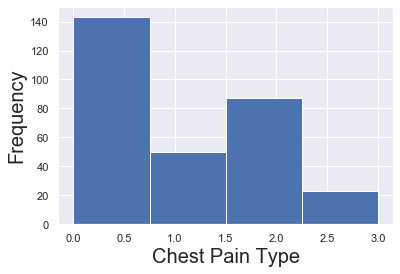

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64


In [11]:
# Understand the "cp" parameter
print("The chest pain type shown in this dataset:\n", np.unique(df["cp"],return_counts = True))
print("Maximum in chestpain type :", df["cp"].max())
print("Minimum in chestpain type:", df["cp"].min())
print("Type of data in 'cp' column:", type(df["cp"][0]))
plt.hist(df["cp"], bins = 4)
plt.xlabel("Chest Pain Type", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["cp"].describe())

In [12]:
# Preprocess the "cp" parameter
# Get the dummy variables 
cp_columns = pd.get_dummies(df["cp"])
cp_columns = cp_columns.drop([0], axis = 1)
cp_columns_names = ["cp_1", "cp_2", "cp_3"]
cp_columns.columns = cp_columns_names
df_cp = pd.concat([df, cp_columns], axis = 1)
df_cp.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'cp_1', 'cp_2', 'cp_3'], dtype=object)

In [13]:
# Reorder the columns and delete the original "cp" parameter
df_cp = df_cp.drop(["cp"], axis = 1)
df_cp = df_cp[['age', 'sex','cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
df_cp.head()       

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,0,1,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,0,1,0,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,0,0,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,0,0,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The resting electrocardiographic results shown in this dataset:
 (array([0, 1, 2], dtype=int64), array([147, 152,   4], dtype=int64))
Maximum in resting electrocardiographic results: 2
Minimum in resting electrocardiographic results: 0
Type of data in 'restecg' column: <class 'numpy.int64'>


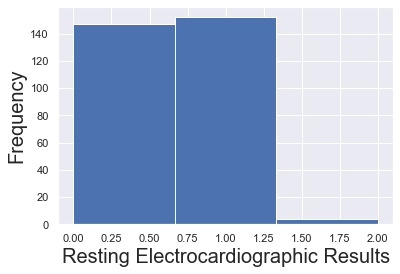

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64


In [14]:
# Understand the "restecg" parameter
print("The resting electrocardiographic results shown in this dataset:\n", np.unique(df["restecg"],return_counts = True))
print("Maximum in resting electrocardiographic results:", df["restecg"].max())
print("Minimum in resting electrocardiographic results:", df["restecg"].min())
print("Type of data in 'restecg' column:", type(df["restecg"][0]))
plt.hist(df["restecg"], bins = 3)
plt.xlabel("Resting Electrocardiographic Results", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["restecg"].describe())

In [15]:
# Preprocess the "restecg" parameter
restecg_columns = pd.get_dummies(df["restecg"])
restecg_columns = restecg_columns.drop([0], axis = 1)
restecg_columns_names = ["restecg_1", "restecg_2"]
restecg_columns.columns = restecg_columns_names
df_cp_restecg = pd.concat([df_cp, restecg_columns], axis = 1)
df_cp_restecg.columns.values

array(['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target', 'restecg_1', 'restecg_2'], dtype=object)

In [16]:
# Reorder the columns and delete the original "restecg" parameter
df_cp_restecg = df_cp_restecg.drop(["restecg"], axis = 1)
df_cp_restecg = df_cp_restecg[['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg_1', 'restecg_2', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target']]
df_cp_restecg.head()       

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_1,restecg_2,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,0,1,145,233,1,0,0,150,0,2.3,0,0,1,1
1,37,1,0,1,0,130,250,0,1,0,187,0,3.5,0,0,2,1
2,41,0,1,0,0,130,204,0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,0,0,120,236,0,1,0,178,0,0.8,2,0,2,1
4,57,0,0,0,0,120,354,0,1,0,163,1,0.6,2,0,2,1


The slope of the peak exercise ST segment shown in this dataset:
 (array([0, 1, 2], dtype=int64), array([ 21, 140, 142], dtype=int64))
Maximum in slope of the peak exercise ST segment 2
Minimum in slope of the peak exercise ST segment: 0
Type of data in 'slope' column: <class 'numpy.int64'>


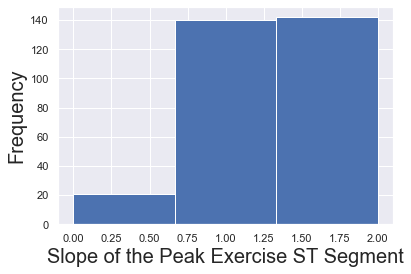

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64


In [17]:
# Understand the "slope" parameter
print("The slope of the peak exercise ST segment shown in this dataset:\n", np.unique(df["slope"],return_counts = True))
print("Maximum in slope of the peak exercise ST segment", df["slope"].max())
print("Minimum in slope of the peak exercise ST segment:", df["slope"].min())
print("Type of data in 'slope' column:", type(df["slope"][0]))
plt.hist(df["slope"], bins = 3)
plt.xlabel("Slope of the Peak Exercise ST Segment", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["slope"].describe())

In [18]:
# Preprocess the "slope" parameter
slope_columns = pd.get_dummies(df["slope"])
slope_columns = slope_columns.drop([0], axis = 1)
slope_columns_names = ["slope_1", "slope_2"]
slope_columns.columns = slope_columns_names
df_cp_restecg_slope = pd.concat([df_cp_restecg, slope_columns], axis = 1)
df_cp_restecg_slope.columns.values

array(['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg_1', 'restecg_2', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target', 'slope_1', 'slope_2'], dtype=object)

In [19]:
# Reorder the columns and delete the original "slope" parameter
df_cp_restecg_slope = df_cp_restecg_slope.drop(["slope"], axis = 1)
df_cp_restecg_slope = df_cp_restecg_slope[['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg_1', 'restecg_2', 'thalach', 'exang', 'oldpeak',  'slope_1', 'slope_2',
       'ca', 'thal', 'target']]
df_cp_restecg_slope.head()       

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_1,restecg_2,thalach,exang,oldpeak,slope_1,slope_2,ca,thal,target
0,63,1,0,0,1,145,233,1,0,0,150,0,2.3,0,0,0,1,1
1,37,1,0,1,0,130,250,0,1,0,187,0,3.5,0,0,0,2,1
2,41,0,1,0,0,130,204,0,0,0,172,0,1.4,0,1,0,2,1
3,56,1,1,0,0,120,236,0,1,0,178,0,0.8,0,1,0,2,1
4,57,0,0,0,0,120,354,0,1,0,163,1,0.6,0,1,0,2,1


Thallium shown in this dataset:
 (array([0, 1, 2, 3], dtype=int64), array([  2,  18, 166, 117], dtype=int64))
Maximum in thallium: 3
Minimum in thallium: 0
Type of data in 'thal' column: <class 'numpy.int64'>


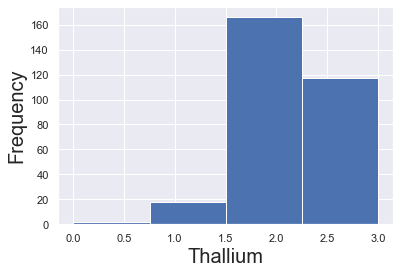

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64


In [20]:
# Understand the "thal" parameter
print("Thallium shown in this dataset:\n", np.unique(df["thal"],return_counts = True))
print("Maximum in thallium:", df["thal"].max())
print("Minimum in thallium:", df["thal"].min())
print("Type of data in 'thal' column:", type(df["thal"][0]))
plt.hist(df["thal"], bins = 4)
plt.xlabel("Thallium", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()
print(df["thal"].describe())

In [21]:
# Preprocess the "thal" parameter
thal_columns = pd.get_dummies(df["thal"])
thal_columns = thal_columns.drop([0], axis = 1)
thal_columns_names = ["thal_1", "thal_2", "thal_3"]
thal_columns.columns = thal_columns_names
df_cp_restecg_slope_thal = pd.concat([df_cp_restecg_slope, thal_columns], axis = 1)
df_cp_restecg_slope_thal.columns.values

array(['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg_1', 'restecg_2', 'thalach', 'exang', 'oldpeak', 'slope_1',
       'slope_2', 'ca', 'thal', 'target', 'thal_1', 'thal_2', 'thal_3'],
      dtype=object)

In [22]:
# Reorder the columns and delete the original "slope" parameter
df_cp_restecg_slope_thal = df_cp_restecg_slope_thal.drop(["thal"], axis = 1)
df_cp_restecg_slope_thal = df_cp_restecg_slope_thal[['age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs',
       'restecg_1', 'restecg_2', 'thalach', 'exang', 'oldpeak', 'slope_1',
       'slope_2', 'ca', 'thal_1', 'thal_2', 'thal_3', 'target']]
df_cp_restecg_slope_thal.head()       

,age,sex,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_1,restecg_2,thalach,exang,oldpeak,slope_1,slope_2,ca,thal_1,thal_2,thal_3,target
0,63,1,0,0,1,145,233,1,0,0,150,0,2.3,0,0,0,1,0,0,1
1,37,1,0,1,0,130,250,0,1,0,187,0,3.5,0,0,0,0,1,0,1
2,41,0,1,0,0,130,204,0,0,0,172,0,1.4,0,1,0,0,1,0,1
3,56,1,1,0,0,120,236,0,1,0,178,0,0.8,0,1,0,0,1,0,1
4,57,0,0,0,0,120,354,0,1,0,163,1,0.6,0,1,0,0,1,0,1


## 4. Export the Preprocessed Dataframe
All the columns of the dataframe have been reviewed and preprocessed. I would save a copy and export it to csv file. 

In [23]:
df_preprocessed = df_cp_restecg_slope_thal.copy()
df_preprocessed.to_csv("heart_preprocessed.csv")

## 5. References
#### Kaggle dataset: https://www.kaggle.com/ronitf/heart-disease-uci
#### Project McNulty: Estimating the Risk of Heart Disease: https://lucdemortier.github.io/projects/3_mcnulty
#### Introduction to Computation and Programming Using Python with Application to Understanding Data, John V. Guttag
#### Udemy Data Science Course: https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/